In [1]:
import numpy as np
import scipy.integrate
from matplotlib import pyplot as plt
import scipy.integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
ome_rad, ome_m, ome_k, ome_DE, H_0, c = 0, 0.27, 0, 0.73, 73.8, 299792

In [3]:
E_function = lambda z: 1/np.sqrt( ome_rad*(1+z)**4 + ome_m*(1+z)**3 + ome_k*(1+z)**2 
                    + (1-ome_m)*(1+z)**(3*(1+ome_0 + ome_a))*np.exp(-3*ome_a*(1-(1+z)**-1)))

def angular_diameter(z1, z2):
    integral = scipy.integrate.quad(E_function, z1, z2)[0]
    distance = c*integral/((1+z2)*H_0)
    return distance

def beta_calculation(Z):
    Ds1, Ds2 = angular_diameter(0, Z[1]), angular_diameter(0, Z[2])
    Dls1, Dls2 = angular_diameter(Z[0], Z[1]), angular_diameter(Z[0], Z[2])
    beta = (Dls1*Ds2)/(Dls2*Ds1)
    return beta

def sigma(theta_1, theta_2):
    sigma_s = [(theta_1[1] + theta_1[2])/2 , (theta_2[1] + theta_2[2])/2]
    return sigma_s
    
def propagation_beta(theta_1, theta_2, sigma_s):
    sigma = 2*theta_1[0]*np.sqrt(sigma_s[0]**2 
                            + (theta_1[0]**2/theta_2[0]**2)*sigma_s[1]**2)/theta_2[0]**2
    return sigma

def chi_squared(beta_1, beta_2):
    chi = (beta_1_exp - beta_1)**2/sigma_s1**2 + (beta_2_exp - beta_2)**2/sigma_s2**2
    return(chi)

def contour(ome_0_values,ome_a_values, chi_squared_values):
    xmesh,ymesh=np.meshgrid(ome_0_values,ome_a_values)
    plt.figure(figsize=(7,6))
    plt.pcolormesh(xmesh, ymesh, chi_squared_values, cmap='gist_rainbow')
    plt.title(u'$\chi^2$', fontsize=18)
    plt.xlabel(u'$\omega_0$', fontsize=18)
    plt.ylabel(u'$\omega_a$', fontsize=18)
    plt.colorbar()
    plt.show()

In [4]:
ome_0_values = np.linspace(-1.5, 0, 100)
ome_a_values = np.linspace(-2, 1.5, 100)  
chi_squared_values = np.zeros((len(ome_a_values),len(ome_0_values)))

0.9784566461181562 0.8664366942051004 0.6641890974014634 0.6294841188940135


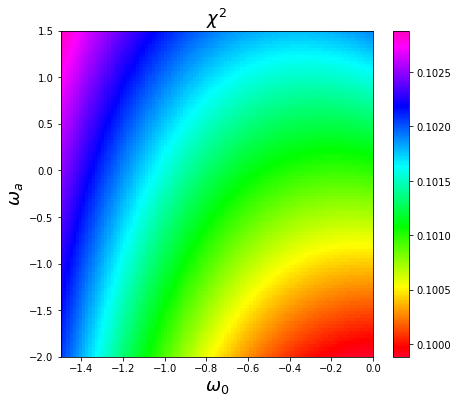

In [5]:
#Original systems
Z_1, theta_11, theta_12 = [0.04956, 0.694, 0.954], [2.74, 0.13, 1.56], [2.77, 0.19, 1.57]
Z_2, theta_21, theta_22 = [0.04865, 0.165, 0.264], [1.85, 0.06, 1.13], [2.27, 0.08, 1.50]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)

0.9784566461181562 0.1632108232199219 0.6641890974014634 0.06362199004256905


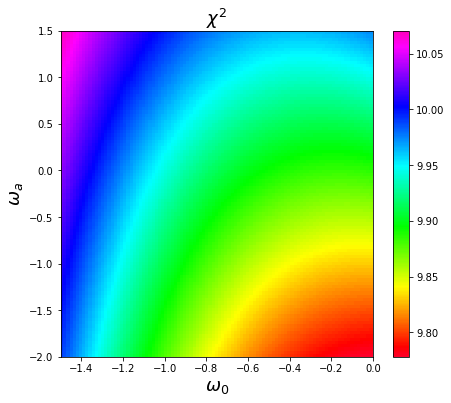

In [6]:
#Only upper limits
Z_1, theta_11, theta_12 = [0.04956, 0.694, 0.954], [2.74, 0.13, 0.13], [2.77, 0.19, 0.19]
Z_2, theta_21, theta_22 = [0.04865, 0.165, 0.264], [1.85, 0.06, 0.06], [2.27, 0.08, 0.08]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)

0.9784566461181562 0.020091588977721928 0.6641890974014634 0.018525986429517083


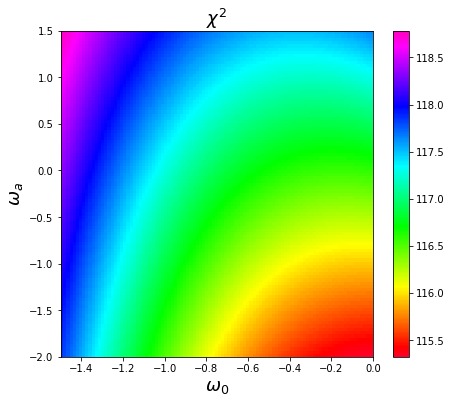

In [7]:
#Reducing uncertainties of each Einstein radius
Z_1, theta_11, theta_12 = [0.04956, 0.694, 0.954], [2.74, 0.02, 0.02], [2.77, 0.02, 0.02]
Z_2, theta_21, theta_22 = [0.04865, 0.165, 0.264], [1.85, 0.02, 0.02], [2.27, 0.02, 0.02]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)

0.75012921 0.2291569804038467 0.75012921 0.2291569804038467


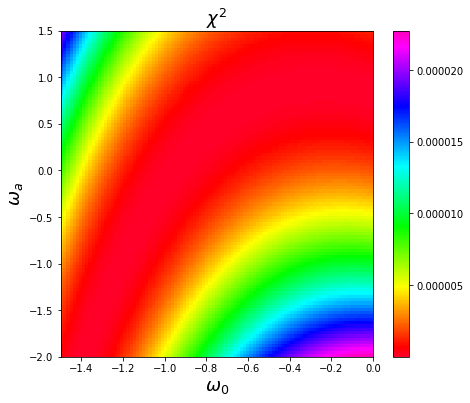

In [8]:
#Distribution of redshits: z, z1= 2z, z2= 1.5z1, einstein radii fake, uncertainty beta 0.2
Z_1, theta_11, theta_12 = [0.04956, 0.09912, 0.14868], [0.8661, 0.1, 0.1], [1, 0.1, 0.1]
Z_2, theta_21, theta_22 = [0.04865, 0.09730, 0.14595], [0.8661, 0.1, 0.1], [1, 0.1, 0.1]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)

0.75012921 0.11457849020192334 0.75012921 0.11457849020192334


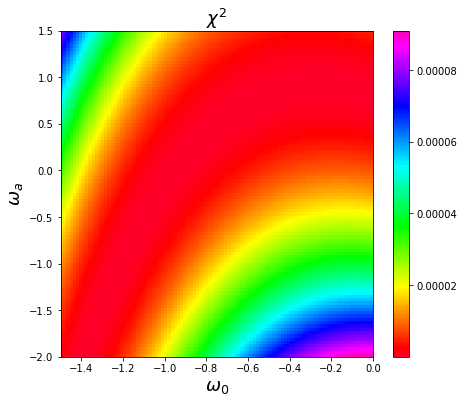

In [9]:
#Distribution of redshits: z, z1= 2z, z2= 1.5z1, einstein radii fake, uncertainty beta 0.1
Z_1, theta_11, theta_12 = [0.04956, 0.09912, 0.14868], [0.8661, 0.05, 0.05], [1, 0.05, 0.05]
Z_2, theta_21, theta_22 = [0.04865, 0.09730, 0.14595], [0.8661, 0.05, 0.05], [1, 0.05, 0.05]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)

0.75012921 0.022915698040384666 0.75012921 0.022915698040384666


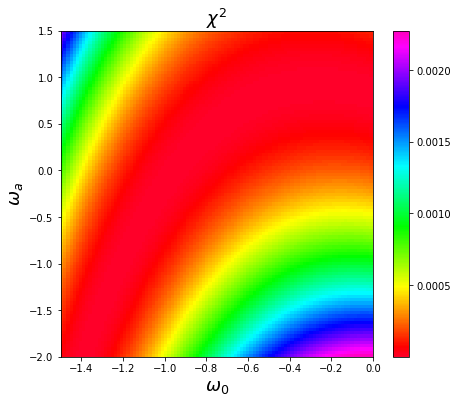

In [10]:
#Distribution of redshits: z, z1= 2z, z2= 1.5z1, einstein radii fake, uncertainty beta 0.02
Z_1, theta_11, theta_12 = [0.04956, 0.09912, 0.14868], [0.8661, 0.01, 0.01], [1, 0.01, 0.01]
Z_2, theta_21, theta_22 = [0.04865, 0.09730, 0.14595], [0.8661, 0.01, 0.01], [1, 0.01, 0.01]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)

0.75012921 0.0017322000000649686 0.75012921 0.0017322000000649686


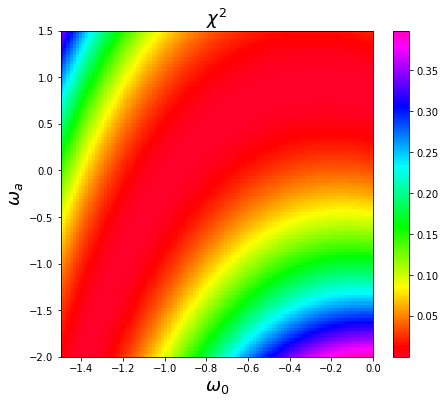

In [11]:
#Distribution of redshits: z, z1= 2z, z2= 1.5z1, einstein radii fake, uncertainty beta 0.001
Z_1, theta_11, theta_12 = [0.04956, 0.09912, 0.14868], [0.8661, 0.001, 0.001], [1, 0.00000001, 0.00000001]
Z_2, theta_21, theta_22 = [0.04865, 0.09730, 0.14595], [0.8661, 0.001, 0.001], [1, 0.00000001, 0.00000001]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)

0.75568249 0.2303682717470095 0.75568249 0.2303682717470095


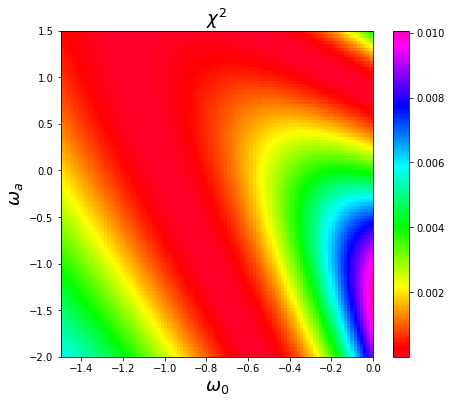

In [12]:
#Distribution of higher redshits: z, z1= 2z, z2= 1.5z1, einstein radii fake, 
#uncertainty beta 0.2
Z_1, theta_11, theta_12 = [0.5, 1, 1.5], [0.8693, 0.1, 0.1], [1, 0.1, 0.1]
Z_2, theta_21, theta_22 = [0.5, 1, 1.5], [0.8693, 0.1, 0.1], [1, 0.1, 0.1]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)

0.75568249 0.11518413587350475 0.75568249 0.11518413587350475


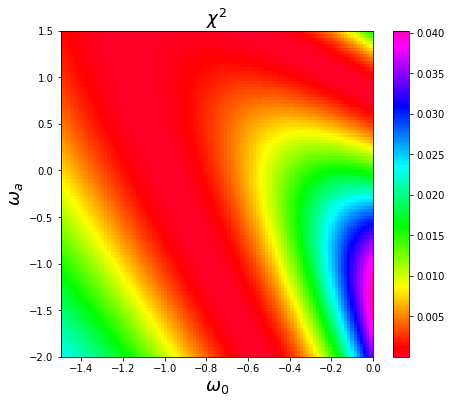

In [13]:
#Distribution of higher redshits: z, z1= 2z, z2= 1.5z1, einstein radii fake, 
#uncertainty beta 0.1
Z_1, theta_11, theta_12 = [0.5, 1, 1.5], [0.8693, 0.05, 0.05], [1, 0.05, 0.05]
Z_2, theta_21, theta_22 = [0.5, 1, 1.5], [0.8693, 0.05, 0.05], [1, 0.05, 0.05]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)

0.75568249 0.023036827174700947 0.75568249 0.023036827174700947


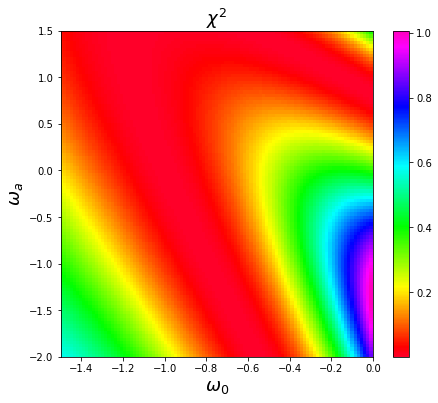

In [14]:
#Distribution of higher redshits: z, z1= 2z, z2= 1.5z1, einstein radii fake, 
#uncertainty beta 0.1
Z_1, theta_11, theta_12 = [0.5, 1, 1.5], [0.8693, 0.01, 0.01], [1, 0.01, 0.01]
Z_2, theta_21, theta_22 = [0.5, 1, 1.5], [0.8693, 0.01, 0.01], [1, 0.01, 0.01]
sigma_1, sigma_2 = sigma(theta_11, theta_12), sigma(theta_21, theta_22)
sigma_s1, sigma_s2 = propagation_beta(theta_11, theta_12, sigma_1), propagation_beta(theta_21, theta_22, sigma_2)
beta_1_exp, beta_2_exp = theta_11[0]**2/theta_12[0]**2, theta_21[0]**2/theta_22[0]**2
print(beta_1_exp, sigma_s1, beta_2_exp, sigma_s2)
for i in range(len(ome_a_values)):
    for j in range(len(ome_0_values)):
        ome_a, ome_0 = ome_a_values[i], ome_0_values[j]
        beta_1, beta_2 = beta_calculation(Z_1), beta_calculation(Z_2)
        chi_squared_values[i,j] = chi_squared(beta_1, beta_2)  
contour(ome_0_values, ome_a_values, chi_squared_values)